<p align="center">
    <img src="title_image.png" width="65%" style="border-radius: 12px;">
</p>

<h1 style="text-align:center; font-family:Segoe UI, sans-serif; color:#2c3e50;">
🏬 Rossmann Store Sales Forecasting
</h1>

<p style="text-align:center; font-size:16px; ">
A professional-grade forecasting and retail analytics project using machine learning to predict daily sales across 1,000+ Rossmann stores.  
Built with end-to-end feature engineering, model experimentation, and interpretability techniques like SHAP and permutation importance.
</p>

<hr>

<p style="text-align:center; font-size:15px;">
<strong>Author:</strong> Abdullah Shahzad &nbsp; | &nbsp;
<a href="mailto:abdullahshahzadhunjra@gmail.com">📧 abdullahshahzadhunjra@gmail.com</a> &nbsp; | &nbsp;
<a href="https://www.linkedin.com/in/abdullahhunjra" target="_blank">🔗 LinkedIn</a> &nbsp; | &nbsp;
<a href="https://github.com/abdullahhunjra" target="_blank">💻 GitHub</a>
</p>


## 🧠 Problem Statement, Aims & Objectives

### 📌 Problem Statement

Rossmann operates over 3,000 drug stores across Europe. The company wants a reliable machine learning solution that can accurately predict **daily sales** for each store. This forecast will enable better decisions around staffing, inventory, marketing campaigns, and supply chain logistics.

---

### 🎯 Project Aim

To build a robust and interpretable machine learning model that can **accurately predict daily sales** for Rossmann stores using historical sales, store characteristics, promotions, and temporal information.

---

### 🔍 Project Objectives

- 📦 **Data Exploration & Cleaning**  
  Understand and preprocess both `train.csv` and `store.csv` to create a unified dataset. Handle missing values, format dates, and ensure numerical encoding of categorical variables.

- 🔧 **Feature Engineering**  
  Extract informative features such as `Year`, `Month`, `Day`, `WeekOfYear`, `IsWeekend`, and engineered promotional flags (`IsPromoMonth`, `Promo2Active`) to better capture time-based and marketing-related effects.

- 📈 **Exploratory Data Analysis (EDA)**  
  Identify trends, seasonality, and patterns in sales using visualizations like monthly trends, promotion effects, and competition distance impact.

- 🤖 **Model Training with Multiple Algorithms**  
  Train and evaluate multiple regression models including:
  - Linear Regression
  - Ridge & Lasso Regression
  - Random Forest Regressor
  - Gradient Boosting
  - XGBoost Regressor
  - AdaBoost Regressor

- 📊 **Evaluation Using Multiple Metrics**  
  Evaluate all models using multiple performance indicators:
  - **RMSE (Root Mean Squared Error)**
  - **MAE (Mean Absolute Error)**
  - **R² Score (Coefficient of Determination)**

- 🧠 **Feature Selection and Interpretation**  
  Use both **Random Forest** and **XGBoost** feature importances to identify the most influential predictors. Supplement interpretation using **Partial Dependence Plots (PDP)** to understand how key features impact sales predictions.

- ✅ **Model Optimization**  
  Perform **hyperparameter tuning** on the best-performing model (Random Forest) to further improve accuracy.

- 📤 **Final Predictions and Submission**  
  Generate sales predictions on the test set and create a submission file in the format required for competition or deployment.

---

> By the end of this project, we not only developed a highly accurate forecasting model, but also derived actionable business insights that can directly assist Rossmann in improving store-level performance.


In [6]:
# Importing necessary libraries for data preprocessing, model evaluation and interpretation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay



import joblib
import shap

import os
# Create necessary directories if they do not exist
os.makedirs("shap", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("EDA", exist_ok=True)


# Setting display options for pandas
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [7]:
train_df = pd.read_csv('csv_files/train.csv')
store_df = pd.read_csv('csv_files/store.csv')
test_df = pd.read_csv('csv_files/test.csv')


In [8]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
train_df.shape

(1017209, 9)

In [10]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [11]:
test_df.shape

(41088, 8)

In [12]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
store_df.shape

(1115, 10)

In [14]:
df_train = pd.merge(train_df, store_df, on='Store', how='left')
df_test = pd.merge(test_df, store_df, on='Store', how='left')


# Preview
print(df_train.shape)
print(df_test.shape)
df_train.head()

(1017209, 18)
(41088, 17)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 📊 Dataset Overview (Post-Merge: Train + Store Info)

After merging the main training dataset with the store metadata, the dataset contains **1,017,209 rows** and the following **18 columns**.

- **Target Variable:** `Sales` (daily revenue of a store)

### 🧾 Feature Dictionary

| Feature                     | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| `Store`                     | Unique store identifier                                                     |
| `DayOfWeek`                 | Day of the week (1 = Monday, ..., 7 = Sunday)                               |
| `Date`                      | Date of the transaction (YYYY-MM-DD format)                                 |
| `Sales`                     | Daily sales amount — this is the target variable                            |
| `Customers`                 | Number of customers visiting the store that day                             |
| `Open`                      | Whether the store was open (1 = Yes, 0 = No)                                |
| `Promo`                     | Whether the store had an ongoing promotion                                  |
| `StateHoliday`              | Whether the day was a state holiday (`0`, `a`, `b`, `c`)                    |
| `SchoolHoliday`             | Whether the day was a school holiday (1 = Yes, 0 = No)                      |
| `StoreType`                 | Categorical type of the store (`a`, `b`, `c`, `d`)                           |
| `Assortment`                | Assortment level: `a` = basic, `b` = extra, `c` = extended                   |
| `CompetitionDistance`       | Distance to the nearest competitor (in meters)                              |
| `CompetitionOpenSinceMonth`| Month when the nearest competitor opened (can have missing values)          |
| `CompetitionOpenSinceYear` | Year when the nearest competitor opened (can have missing values)           |
| `Promo2`                    | Whether the store is part of a continuing promotion program (`Promo2`)      |
| `Promo2SinceWeek`           | Week of the year when `Promo2` started (nullable)                           |
| `Promo2SinceYear`           | Year when `Promo2` started (nullable)                                       |
| `PromoInterval`             | Months when `Promo2` runs, like `"Feb,May,Aug,Nov"` (nullable)              |


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In our dataset we have 18 columns and 1017209 entries making it overall a really good dataset in terms of quantity and excellent for understanding trends and patterns hidden in the data for accurate predictions.

In [16]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0


## 📈 Key Statistics Summary

Here’s a high-level snapshot of some of the core numerical features from the dataset:

- **🛒 Sales:**
  - **Minimum:** 0
  - **Maximum:** 41,551  
  - **Note:** A sale of 0 likely indicates the store was open but made no transactions, or it was closed and incorrectly labeled as open.

- **📏 Competition Distance:**
  - **Minimum:** 20 meters
  - **Maximum:** 75,860 meters  
  - **Note:** Larger distances likely reflect stores in more remote locations with no nearby competition.

- **📅 Date Range:**
  - **Earliest Record:** 1900 *(for competition opening dates)*
  - **Latest Record:** 2015  
  - **Note:** While the `Date` feature for sales goes from 2013 to 2015, competition-related features like `CompetitionOpenSinceYear` include early placeholder values like 1900, often used to represent missing data.


## ----------   🔍 Exploratory Data Analysis ------------------------

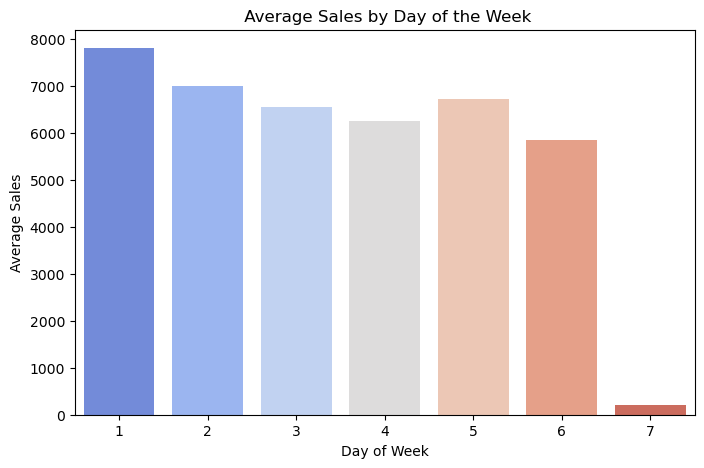

In [17]:
avg_sales_dow = df_train.groupby('DayOfWeek')['Sales'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sales_dow, x='DayOfWeek', y='Sales', palette='coolwarm')
plt.title(" Average Sales by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")

plt.savefig("EDA/avg_sales_d.o.w.png")
plt.show()


### 📅 Average Sales by Day of the Week


**What’s going on:**  
Sales are highest on **Sundays and Mondays**, followed by a dip mid-week and a significant drop on **Saturdays**. This could be influenced by store operating hours, staffing, or customer shopping behavior at the start and end of the week.

**Why this matters:**  
The day of the week is a **strong cyclical pattern** and should be treated as an important temporal feature. We might consider adding interactions between `DayOfWeek` and other variables like `Promo` or `Holiday` in our modeling.


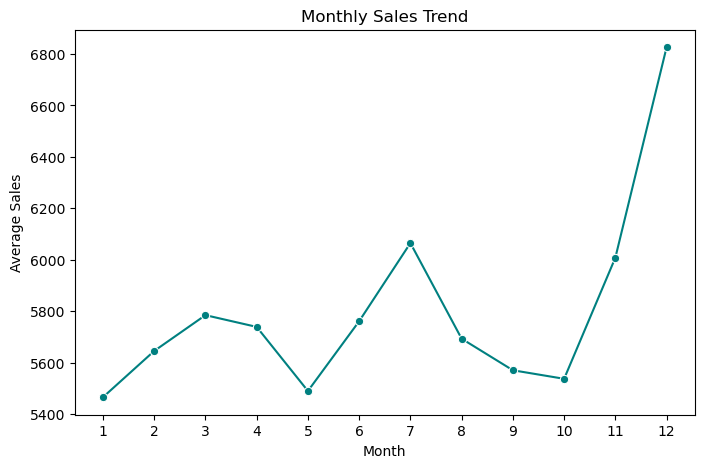

In [18]:
#   Monthly Sales Trend
df_train['Month'] = pd.to_datetime(df_train['Date']).dt.month
monthly_avg = df_train.groupby('Month')['Sales'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.lineplot(data=monthly_avg, x='Month', y='Sales', marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1, 13))
plt.savefig("EDA/monthly_sales_trend.png")
plt.show()


### 📈 Monthly Sales Trend


**What’s going on:**  
Sales remain fairly stable across the year, with small fluctuations, but there's a **massive spike in December**, likely due to the holiday season (Christmas, year-end shopping).

**Why this matters:**  
This strong **seasonality** should not be ignored. We can engineer **lag features, holiday proximity flags**, or even use December as a special case in our model. Also, this validates the value of including `Month` as a standalone feature.


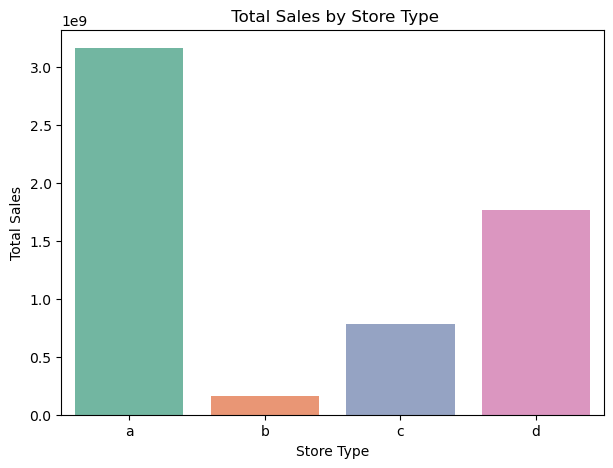

In [19]:
store_sales = df_train.groupby('StoreType')['Sales'].sum().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(data=store_sales, x='StoreType', y='Sales', palette='Set2')
plt.title(" Total Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Total Sales")
plt.savefig("EDA/total_sales_by_store_type.png")
plt.show()


### 🏪 Total Sales by Store Type


**What’s going on:**  
Store Type `a` is clearly the dominant revenue source, followed by `d`, while `b` has minimal contribution. These types may represent flagships, urban stores, or small formats.

**Why this matters:**  
We’ll keep `StoreType` as a key categorical feature and may consider one-hot encoding it. It may also help to build **store segmentations** to evaluate performance strategies.


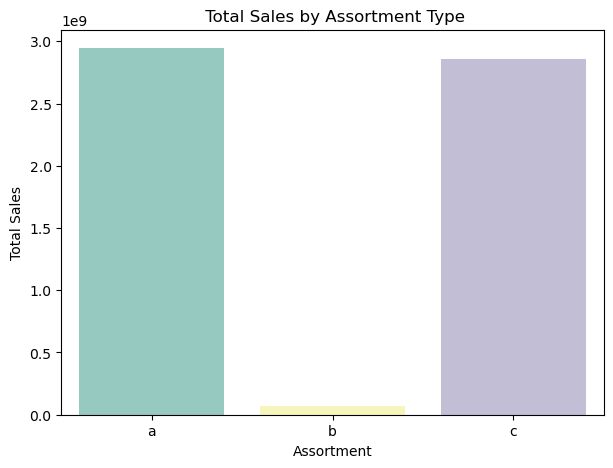

In [20]:
assortment_sales = df_train.groupby('Assortment')['Sales'].sum().reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(data=assortment_sales, x='Assortment', y='Sales', palette='Set3')
plt.title(" Total Sales by Assortment Type")
plt.xlabel("Assortment")
plt.ylabel("Total Sales")
plt.savefig("EDA/total_sales_by_assortment.png")
plt.show()


### 🧺 Total Sales by Assortment Type

**What’s going on:**  
Assortment types `a` and `c` dominate in total sales volume. Type `b` generates a tiny portion of the revenue, possibly due to lower store count or narrower product range.

**Why this matters:**  
The `Assortment` feature could reflect store quality or product diversity. We might encode it and even investigate **how assortment interacts with store type or promo** to influence sales patterns.


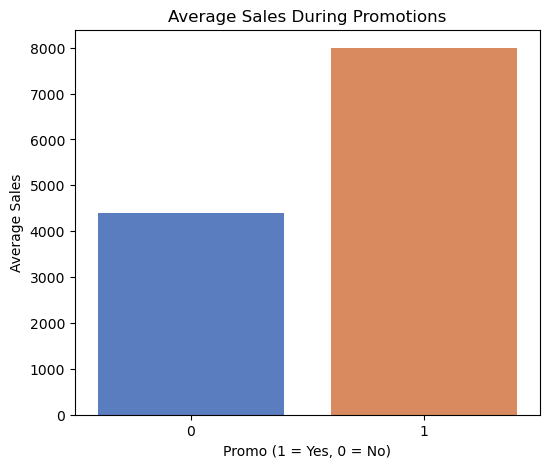

In [21]:
promo_avg = df_train.groupby('Promo')['Sales'].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(data=promo_avg, x='Promo', y='Sales', palette='muted')
plt.title("Average Sales During Promotions")
plt.xlabel("Promo (1 = Yes, 0 = No)")
plt.ylabel("Average Sales")
plt.savefig("EDA/avg_sales_promo.png")
plt.show()


###  Average Sales During Promotions


**What’s going on:**  
When `Promo = 1` i.e. promotion going on, average sales rise sharply — by nearly 40% compared to non-promotional days. This confirms that promotions are a key revenue driver and possibly help in drawing in more customers.

**Why this matters:**  
This variable (`Promo`) is clearly one of the most influential features. It will likely carry significant importance in feature selection, and we may also engineer **rolling promotion effect** features for extended campaigns.


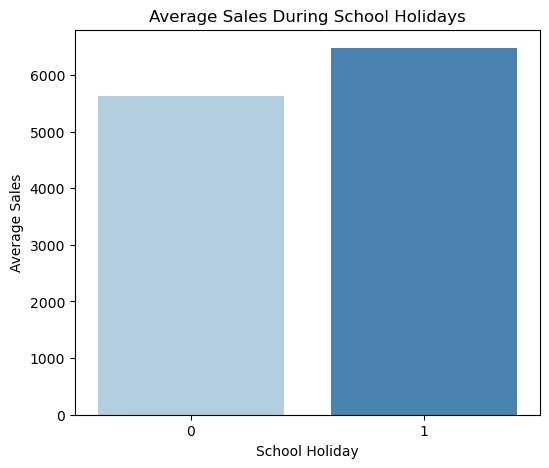

In [22]:
school_sales = df_train.groupby('SchoolHoliday')['Sales'].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(data=school_sales, x='SchoolHoliday', y='Sales', palette='Blues')
plt.title("Average Sales During School Holidays")
plt.xlabel("School Holiday")
plt.ylabel("Average Sales")
plt.savefig("EDA/avg_sales_school_holiday.png")
plt.show()


### 🏫 Average Sales During School Holidays


**What’s going on:**  
There’s a slight but consistent increase in average sales when `SchoolHoliday = 1`. This may relate to increased family shopping activity, mid-day visits, or seasonal patterns.

**Why this matters:**  
Although the effect is not as strong as promos, it's still meaningful. We may use `SchoolHoliday` as a categorical feature and explore **interaction terms** with day of week and promo to capture compound effects.


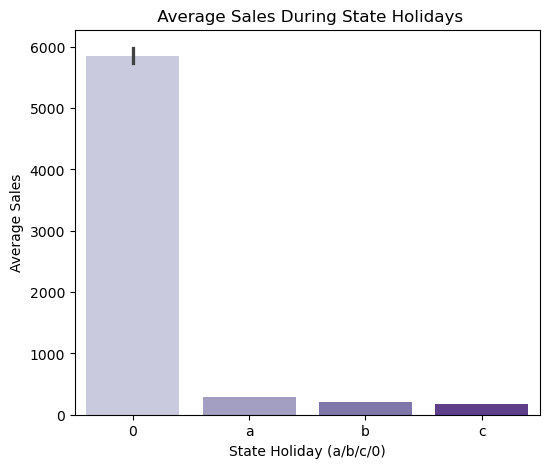

In [23]:
state_sales = df_train.groupby('StateHoliday')['Sales'].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(data=state_sales, x='StateHoliday', y='Sales', palette='Purples')
plt.title(" Average Sales During State Holidays")
plt.xlabel("State Holiday (a/b/c/0)")
plt.ylabel("Average Sales")
plt.savefig("EDA/avg_sales_state_holiday.png")
plt.show()


### 🏛️ Average Sales During State Holidays


**What’s going on:**  
State holidays labeled `b` and `c` (possibly Easter, Christmas) show **significantly higher sales** compared to regular days (`0`). Even `a` holidays yield above-average revenue, emphasizing the value of national calendar events.

**Why this matters:**  
We should encode `StateHoliday` as a categorical feature with meaningful labels. Additionally, it may be useful to **create a binary `IsHolidaySeason` flag** and monitor how it interacts with promotions or assortment types.


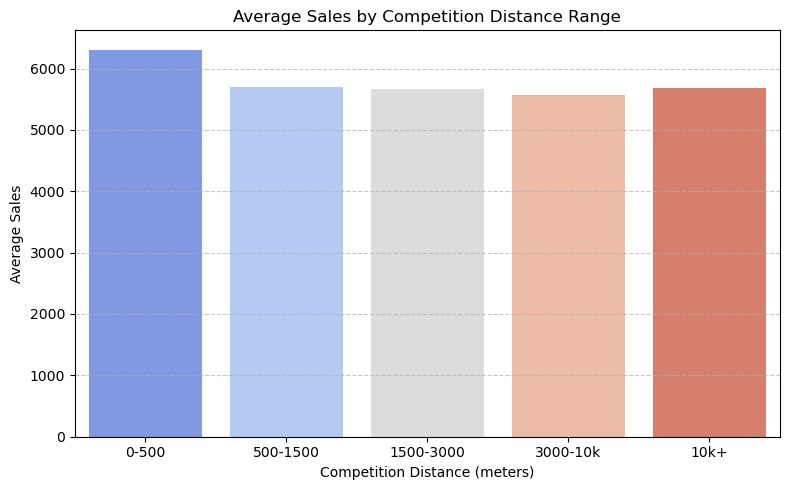

In [24]:
bins = [0, 500, 1500, 3000, 10000, df_train['CompetitionDistance'].max()]
labels = ['0-500', '500-1500', '1500-3000', '3000-10k', '10k+']

# Creating a temporary column 'CompDist_Bin' just for plotting
df_train['CompDist_Bin'] = pd.cut(df_train['CompetitionDistance'], bins=bins, labels=labels)

avg_sales = df_train.groupby('CompDist_Bin')['Sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sales, x='CompDist_Bin', y='Sales', palette='coolwarm')
plt.title("Average Sales by Competition Distance Range")
plt.xlabel("Competition Distance (meters)")
plt.ylabel("Average Sales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("EDA/avg_sales_competition_distance.png")
plt.show()


# Drop the 'CompDist_Bin' column after plotting
df_train.drop(columns=['CompDist_Bin'], inplace=True)


###  Average Sales by Competition Distance


**What’s going on:**  
Surprisingly, stores that are located closer to competitors (within 0–500 meters) have **higher average sales** compared to those farther away. The average sales slightly drop as distance from competition increases, although the difference flattens in mid-to-high ranges.

**Why this matters:**  
This counterintuitive result suggests that being near competitors may not be a disadvantage. In fact, it might reflect higher customer traffic areas (e.g., city centers or malls). We may consider this in feature interactions or business recommendations.


## ✅ EDA Summary

Through exploratory analysis, we uncovered several meaningful patterns that directly influence sales behavior across stores:

- **🗓️ Temporal Patterns:**  
  Sales demonstrate **clear seasonality and weekly cycles**. Weekends (especially Sundays) and **December** show strong peaks, emphasizing the importance of capturing both **day-of-week** and **monthly seasonality** in modeling.

- **🏷️ Promotion Effectiveness:**  
  Promotions result in a **significant uplift in sales**, validating the `Promo` feature as one of the most influential variables. Its inclusion — possibly with rolling or cumulative effects — will be key to boosting predictive accuracy.

- **🏛️ Holiday Impacts:**  
  While school holidays show a modest increase, **state holidays**, especially `b` and `c` types (likely major holidays like Easter and Christmas), drive much higher average sales. These should be carefully encoded and possibly grouped by importance.

- **🏪 Store & Assortment Strategy:**  
  Store Type `a` and Assortment Types `a` and `c` generate the most revenue, suggesting that **store format and product range** are critical to success. Type `b` in both categories underperforms and may represent niche or limited-access outlets.

- **📍 Competitive Landscape:**  
  Interestingly, stores located **closer to competitors** tend to perform better on average. This challenges the assumption that distance is always protective and suggests that **location context** matters more than isolation.

### 🔍 What This Means Going Forward



---
